Name:Shuyi Guan
NetID:sg466
ID:1447

In [1]:
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import perm
from scipy.special import comb
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import geom

# Problem #1

In [74]:
x=[]
y=[]
N = 1000000
x0_y0=0
x0_y1=0
x1_y0=0
x1_y1=0
for n in range(N):
    m = np.random.randint(1,9) 
    if m ==1:
        x.append(0)
        y.append(0)
    elif m ==2:    
        x.append(0)
        y.append(1)
    elif m ==3 or m ==4:
        x.append(1)
        y.append(0)
    else:
        x.append(1)
        y.append(1)
    if x[-1] ==0 and y[-1]==0: 
        x0_y0+=1
    elif x[-1] ==0 and y[-1]==1:
        x0_y1+=1
    elif x[-1] ==1 and y[-1]==0: 
        x1_y0+=1
    elif x[-1] ==1 and y[-1]==1: 
        x1_y1+=1
x0_y0_joint = x0_y0/N
x0_y1_joint = x0_y1/N
x1_y0_joint = x1_y0/N
x1_y1_joint = x1_y1/N
x_0_marginal = x.count(0)/N
x_1_marginal = x.count(1)/N
y_0_marginal = y.count(0)/N
y_1_marginal = y.count(1)/N

print('Joint PMF for XY when x =0 y=0 is estimate:', x0_y0_joint,',true value',1/8)
print('Joint PMF for XY when x =0 y=1 is estimate:', x0_y1_joint,',true value',1/8)
print('Joint PMF for XY when x =1 y=0 is estimate:', x1_y0_joint,',true value',1/4)
print('Joint PMF for XY when x =1 y=1 is estimate:', x1_y1_joint,',true value',1/2)
print('Marginal PMF for x when x =0 is estimate:', x_0_marginal,',true value',1/4)
print('Marginal PMF for x when x =1 is estimate', x_1_marginal,',true value',3/4)
print('Marginal PMF for y when y =0 is estimate', y_0_marginal,',true value',3/8)
print('Marginal PMF for y when y =1 is estimate', y_1_marginal,',true value',5/8)


Joint PMF for XY when x =0 y=0 is estimate: 0.125102 ,true value 0.125
Joint PMF for XY when x =0 y=1 is estimate: 0.12509 ,true value 0.125
Joint PMF for XY when x =1 y=0 is estimate: 0.250204 ,true value 0.25
Joint PMF for XY when x =1 y=1 is estimate: 0.499604 ,true value 0.5
Marginal PMF for x when x =0 is estimate: 0.250192 ,true value 0.25
Marginal PMF for x when x =1 is estimate 0.749808 ,true value 0.75
Marginal PMF for y when y =0 is estimate 0.375306 ,true value 0.375
Marginal PMF for y when y =1 is estimate 0.624694 ,true value 0.625


# Problem #2

In [75]:
n = N
df = pd.DataFrame({'x':x,'y':y})
df['xy'] = df['x']*df['y']
df['x_bar']=df['x'].mean()
df['y_bar']=df['y'].mean()
df['xy_bar'] = df['x_bar']*df['y_bar']
df['x_2'] = df['x']**2
df['y_2'] = df['y']**2
df['x_bar_2'] = df['x_bar']**2
df['y_bar_2'] = df['y_bar']**2
cov = 1/m * (df['xy']-df['xy_bar']).sum()
denom = 1/m * math.sqrt((df['x_2']-df['x_bar_2']).sum()*(df['y_2']-df['y_bar_2']).sum())
print('The correlation coefficient is ',cov/denom)

The correlation coefficient is  0.14878677386692063


## Problem #3

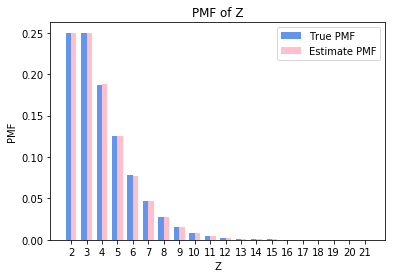

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
p=1/2
N=500000
X = np.random.geometric(p,N)
Y = np.random.geometric(p,N)
Z = X+Y
n=20
Z_pmf=[]
for i in range(2,n+2):
    Z_pmf.append((Z == i).sum() / N)
k = np.arange(2,n+2,1)    
Z_in_formula = (p**2)*(k-1)*((1-p)**(k-2))
labels =k

# plot
x = np.arange(2,n+2,1) 
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Z_in_formula, width, label='True PMF',color='cornflowerblue')
rects2 = ax.bar(x + width/2, Z_pmf, width, label='Estimate PMF',color='pink')

plt.xlabel('Z')
plt.ylabel('PMF')
plt.title('PMF of Z')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

## Problem #4

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


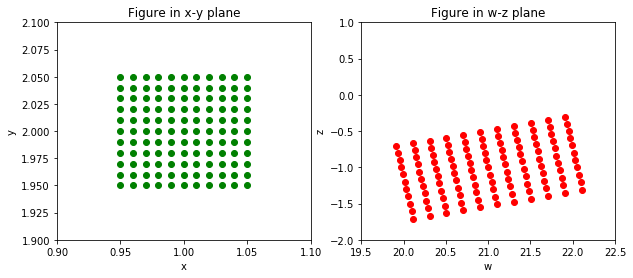

In [6]:
i_list = np.arange(1,12,1)
j_list = np.arange(1,12,1)
x,y,xx,yy,w,z =([] for i in range(6))
for i in i_list:
    x.append(0.95 + (i-1)/100)
for j in j_list:
    y.append(1.95 + (j-1)/100)
plt.figure(figsize=(10, 4))
for xx in x:
    for yy in y:
        plt.subplot(121)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Figure in x-y plane')
        plt.ylim(1.9,2.1)
        plt.xlim(0.9,1.1)
        plt.scatter(xx,yy,c='g')
        w.append(xx**2 + 5*yy**2)
        z.append(-5*xx**2+ yy**2)
        plt.subplot(122)
        plt.xlabel('w')
        plt.ylabel('z')
        plt.title('Figure in w-z plane')
        plt.ylim(-2,1)
        plt.xlim(19.5,22.5)
        plt.scatter(w[-1],z[-1],c='r')      
plt.show()


In [8]:
area_1=(max(x)-min(x))*(max(y)-min(y))
print('Area 1 =',area_1)
short_side = math.sqrt((w[z.index(min(z))]-min(w))**2+(z[w.index(min(w))]-min(z))**2)
long_side = math.sqrt((max(w)-w[z.index(min(z))])**2+(z[w.index(max(w))]-min(z))**2)
area_2=short_side*long_side
print('Area 2 =',area_2)
print('Area ratio =',area_2/area_1)

Area 1 = 0.009999999999999995
Area 2 = 2.0799999999999996
Area ratio = 208.00000000000006


## Problem #5

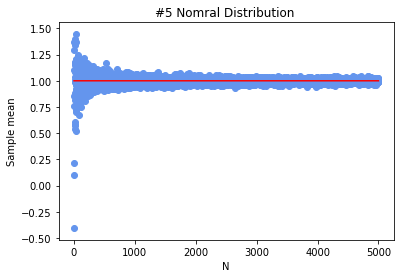

In [7]:
N=5000
mu = 1
sigma=1
x_axis = np.arange(1,N,1)
mean=[]
converge=[1 for n in range(1,N)]
for n in range(1,N):
    x = np.random.normal(mu, sigma, n)
    mean.append(sum(x)/len(x))
plt.scatter(x_axis,mean,color='cornflowerblue')
plt.plot(x_axis,converge,color='red')
plt.title('#5 Nomral Distribution ')
plt.xlabel('N')
plt.ylabel('Sample mean')
plt.show()

## Problem #6

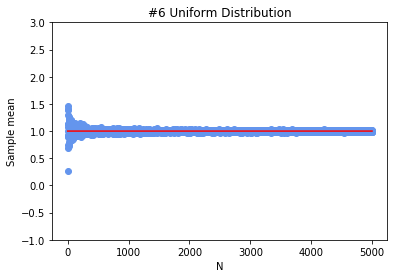

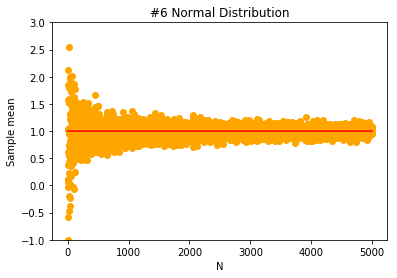

In [9]:
N=5000
mean_uni=[]
mean_norm=[]
x_axis = np.arange(1,N,1)
converge=[1 for n in range(1,N)]
for n in range(1,N):
    x_uni = np.random.uniform(0,2,n)
    x_norm = np.random.normal(1, 4, n)
    mean_uni.append(sum(x_uni)/len(x_uni))
    mean_norm.append(sum(x_norm)/len(x_norm))
plt.title('#6 Uniform Distribution')
plt.scatter(x_axis,mean_uni,color='cornflowerblue')
plt.plot(x_axis,converge,'r')
plt.ylim(-1,3)
plt.xlabel('N')
plt.ylabel('Sample mean')
plt.show()
plt.title('#6 Normal Distribution')
plt.scatter(x_axis,mean_norm,color='orange')
plt.plot(x_axis,converge,'r')
plt.ylim(-1,3)
plt.xlabel('N')
plt.ylabel('Sample mean')
plt.show()